In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from sklearn import mixture
from scipy.stats import norm
import math

In [2]:
tab=pd.read_csv("sigref.csv",header=None);
tab=np.array(tab);
n=len(tab)
n

100

In [3]:
tab.shape

(100, 120)

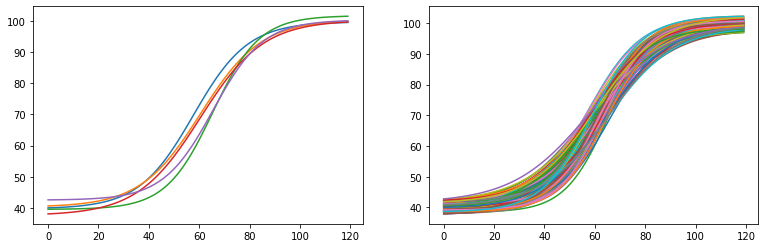

In [4]:
figure=plt.figure(figsize=(13,4));
ax=plt.subplot(1,2,1);
for i in range(5):
    ax.plot(tab[i*2])
ax=plt.subplot(1,2, 2);
for i in range(n):
    ax.plot(tab[i])


In [5]:
#PCA on raw data

#YOU CENTER THE COLUMNS 

tab_centered= tab - np.mean(tab , axis = 0)

In [6]:

# Dimensionality Reduction and Manifold Learning
# Principal Components Analysis (PCA)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import decomposition
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
import seaborn as sb
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sb.set(font_scale=1.2,style="whitegrid")

In [7]:
# Before applying PCA, each feature should be centered (zero mean) and with unit variance
scaler=StandardScaler().fit(tab)
tab_normalized = scaler.transform(tab)  

pca = PCA(n_components = 20).fit(tab_normalized)

X_pca = pca.transform(tab_normalized)

In [8]:
pca1 = PCA(n_components = 20).fit(tab_centered)

In [9]:
variance = pca1.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([ 61.8,  90. ,  97.5,  99.9, 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. ])

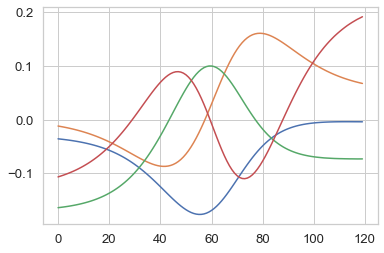

In [10]:
for i in range (4):
    plt.plot(pca1.components_[i])

<BarContainer object of 20 artists>

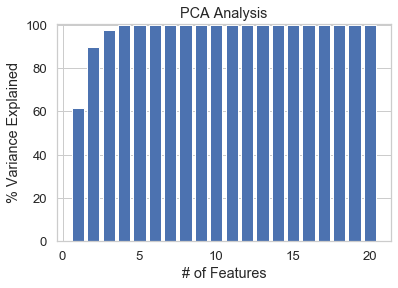

In [11]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)
plt.style.context('seaborn-whitegrid')


plt.bar(range(1,21),var)

We should keep 4 axes to explain 99% of the total varaince 

In [12]:
# les 4 premier axes epliques 99% des donnes
new_matrix=np.zeros( (100, 4) )
for j in range(4):
    for i in range(100):
        new_matrix[i,j]=np.vdot(tab_normalized[i,:],pca.components_[j])


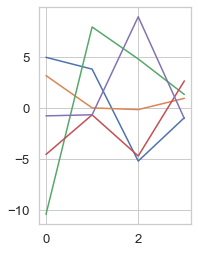

In [13]:
ax=plt.subplot(1,2,1);
for i in range(5):
    ax.plot(new_matrix[i*2])

In [14]:
# signal compression
np.vdot(tab_centered[0,:],pca.components_[0])

16.376192161078173

In [25]:
tab1=np.zeros((100,120)) #en nant un seul eigen value
for i in range( 100):
    tab1[i,:]= np.mean(tab , axis = 0)+np.vdot(tab_centered[i,:],pca1.components_[0])*pca1.components_[0]
tab1

array([[41.09540118, 41.13440886, 41.17676023, ..., 99.60029417,
        99.63880329, 99.67564197],
       [40.586852  , 40.61860598, 40.65313464, ..., 99.54495258,
        99.58320176, 99.61922721],
       [40.6371447 , 40.66961603, 40.70491831, ..., 99.55042556,
        99.58870045, 99.62480632],
       ...,
       [39.61458785, 39.63247394, 39.65204684, ..., 99.43914838,
        99.4769006 , 99.51137127],
       [41.22101875, 41.26181817, 41.30610184, ..., 99.61396418,
        99.65253751, 99.68957707],
       [40.71591469, 40.74950956, 40.78602352, ..., 99.5589975 ,
        99.59731266, 99.63354449]])

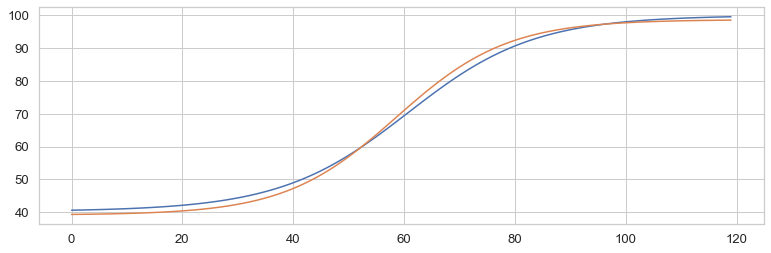

In [26]:
figure=plt.figure(figsize=(13,4));
ax=plt.subplot(1,1,1);
ax.plot(tab1[1])
ax.plot(tab[1])

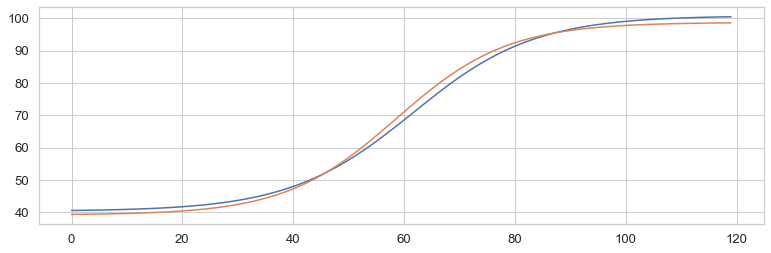

In [29]:
tab1=np.zeros((100,120))#en prenant un seul eigen value
for i in range( 100):
    tab1[i,:]= np.mean(tab , axis = 0)+np.vdot(tab_centered[i,:],pca.components_[0])*pca.components_[0]+np.vdot(tab_centered[i,:],pca.components_[1])*pca.components_[1]
figure=plt.figure(figsize=(13,4));
ax=plt.subplot(1,1,1);
ax.plot(tab1[1])
ax.plot(tab[1])

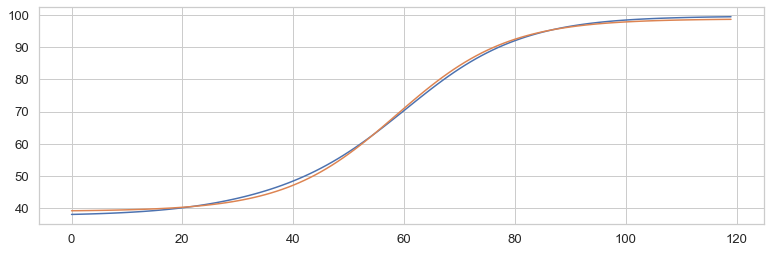

In [30]:
tab1=np.zeros((100,120))#en prenant un seul eigen value
for i in range( 100):
    tab1[i,:]= np.mean(tab , axis = 0)+np.vdot(tab_centered[i,:],pca.components_[0])*pca.components_[0]+np.vdot(tab_centered[i,:],pca.components_[1])*pca.components_[1]+np.vdot(tab_centered[i,:],pca.components_[2])*pca.components_[2]
figure=plt.figure(figsize=(13,4));
ax=plt.subplot(1,1,1);
ax.plot(tab1[1])
ax.plot(tab[1])

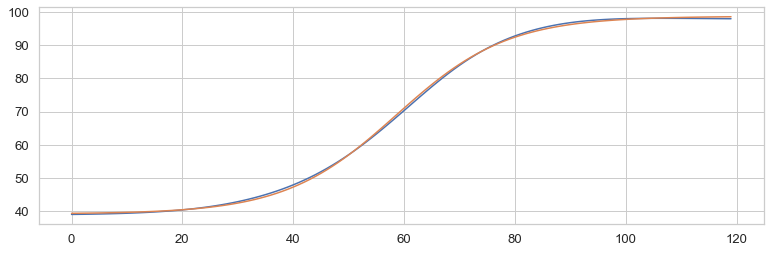

In [31]:
tab1=np.zeros((100,120))#en prenant un seul eigen value
for i in range( 100):
    tab1[i,:]= np.mean(tab , axis = 0)+np.vdot(tab_centered[i,:],pca.components_[0])*pca.components_[0]+np.vdot(tab_centered[i,:],pca.components_[1])*pca.components_[1]+np.vdot(tab_centered[i,:],pca.components_[2])*pca.components_[2]+np.vdot(tab_centered[i,:],pca.components_[3])*pca.components_[3]
figure=plt.figure(figsize=(13,4));
ax=plt.subplot(1,1,1);
ax.plot(tab1[1])
ax.plot(tab[1])

In [32]:
#quadratic errors 

from sklearn.metrics import mean_squared_error 
  
 
  
# Calculation of Mean Squared Error (MSE) 
mean_squared_error(tab1,tab) 

0.09749105700454527